## Questions
How to sort 'Patient Id' column as "P1, P2, P3 ,..."


# Upload the Cancer patient dataset into dataframe

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
https://www.digitalocean.com/community/tutorials/python-io-bytesio-stringio

Import the dataset into a dataframe

In [1]:
import pandas as pd
df = pd.read_csv('cancer_patient_dataset.csv')

In [2]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


# Todo
- Data Cleaning
- Descriptive Statistics
- Correlations

# Objective
What are the differences in symptoms and lifestyles between different ages and genders?



# Data Cleaning

## Missing data
https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

In [3]:
df.isnull().sum().sum()

0

## Remove duplicate rows based on all columns
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [4]:
dfnoduplicates = df.drop_duplicates()

## Remove irrelevant columns:
Bankar (2020) analyzed the same dataset for feature importance
5 features irrelevant (chronic lung disease, weight loss, difficulty swallowing, frequent colds, dry cough)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [5]:
list(df.columns)

['Patient Id',
 'Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring',
 'Level']

In [6]:
dfrelevant = dfnoduplicates.drop(['chronic Lung Disease', 'Weight Loss', 'Swallowing Difficulty', 'Frequent Cold', 'Dry Cough'], axis=1)

In [7]:
list(dfrelevant.columns)

['Patient Id',
 'Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Shortness of Breath',
 'Wheezing',
 'Clubbing of Finger Nails',
 'Snoring',
 'Level']

## Check for outliers

using boxplot https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

In [8]:
dfrelevant.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Wheezing,Clubbing of Finger Nails,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,4,3,2,2,4,3,2,2,1,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,4,2,3,1,7,8,2,2,Medium
2,P100,35,1,4,5,6,5,5,6,7,2,3,4,8,8,9,2,4,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,8,4,3,1,5,5,High
4,P101,46,1,6,8,7,7,7,7,7,8,7,7,9,3,4,1,2,3,High


Removed patient ID, gender and level, Because these type of data do not have outliers

In [9]:
dfoutlier = dfrelevant.drop(['Patient Id', 'Gender', 'Level'], axis=1)

List all columns

In [10]:
dfoutlier.columns = dfoutlier.columns.str.replace(" ", "_")

In [11]:
list(dfoutlier.columns)

['Age',
 'Air_Pollution',
 'Alcohol_use',
 'Dust_Allergy',
 'OccuPational_Hazards',
 'Genetic_Risk',
 'Balanced_Diet',
 'Obesity',
 'Smoking',
 'Passive_Smoker',
 'Chest_Pain',
 'Coughing_of_Blood',
 'Fatigue',
 'Shortness_of_Breath',
 'Wheezing',
 'Clubbing_of_Finger_Nails',
 'Snoring']

boxplotted age separately, since it doesn't scale well with other variables in same charts.
Its the only outlier, but for age its natural.

In [12]:
import matplotlib as plt
import numpy as np
import pandas as pd

<AxesSubplot:>

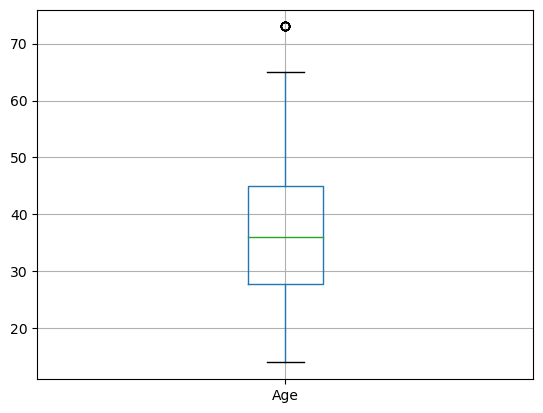

In [13]:
dfoutlier.boxplot(column=['Age'])

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

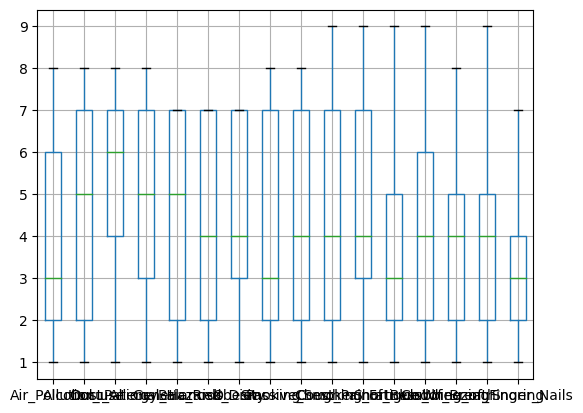

In [15]:
dfoutlier.boxplot(column=[
 'Air_Pollution',
 'Alcohol_use',
 'Dust_Allergy',
 'OccuPational_Hazards',
 'Genetic_Risk',
 'Balanced_Diet',
 'Obesity',
 'Smoking',
 'Passive_Smoker',
 'Chest_Pain',
 'Coughing_of_Blood',
 'Fatigue',
 'Shortness_of_Breath',
 'Wheezing',
 'Clubbing_of_Finger_Nails',
 'Snoring'
])
plt.show()

# Descriptive Statistics

In [16]:
dfrelevant.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Wheezing,Clubbing of Finger Nails,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,4.240000,3.777000,3.923000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.285087,2.041921,2.388048,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,5.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,7.000000


Replace 'Low', 'Medium', 'High' with 1, 2, 3 for Crosstabulation etc analysis
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [17]:
dfrelevant.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [18]:
dflevel=dfrelevant.replace(['Low', 'Medium', 'High'], [1, 2, 3])

See correlations with different variables

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [19]:
dflevel.corr(method='pearson')

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Wheezing,Clubbing of Finger Nails,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.004863,0.034337,0.075333,0.004908,0.012864,0.053006,0.095059,0.035329,-0.095354,0.039258,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.099741,-0.123813,-0.206924,-0.184826,-0.218426,-0.146505,-0.116467,-0.045972,-0.076304,-0.034219,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.524873,0.601468,0.481902,0.606764,0.585734,0.607829,0.211724,0.269558,0.055368,0.241065,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.653352,0.669312,0.547035,0.592576,0.717242,0.667612,0.237245,0.435785,0.180817,0.414992,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.647197,0.700676,0.358691,0.560002,0.639983,0.625291,0.332472,0.518682,0.304850,0.345714,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.691509,0.722191,0.497693,0.555311,0.775619,0.645947,0.267844,0.366482,0.178925,0.366447,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.679905,0.729826,0.543259,0.609071,0.831751,0.632236,0.230530,0.458200,0.204973,0.357815,-0.056831,0.701303
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,1.000000,0.706922,0.645390,0.725123,0.798207,0.745054,0.400678,0.343623,0.063930,0.041967,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.706922,1.000000,0.486795,0.681889,0.673150,0.814805,0.552788,0.406203,0.094287,0.149093,0.039422,0.827435
Smoking,0.075333,-0.206924,0.481902,0.547035,0.358691,0.497693,0.543259,0.645390,0.486795,1.000000,0.761622,0.647926,0.555289,0.200029,-0.023259,-0.047060,-0.041147,0.189055,0.519530


# Why does higher % of gender 1 have malignant tumours?



## Gender & Cancer Level Crosstab

In [20]:
pd.crosstab(dfrelevant.Gender, [dfrelevant.Level], normalize='index')

Level,High,Low,Medium
Gender,,,
1,0.421405,0.249164,0.329431
2,0.281095,0.383085,0.335821


42% of gender 1 have high-risk malignant cancer, compared to 28% of gender 2
Can differences in lifestyle offer an explanation?


## Gender & Alcohol use

In [21]:
dfrelevant.columns = dfrelevant.columns.str.replace(" ", "_")

In [22]:
pd.crosstab(dfrelevant.Gender, [dfrelevant.Alcohol_use], normalize='index')

Alcohol_use,1,2,3,4,5,6,7,8
Gender,,,,,,,,
1,0.107023,0.137124,0.107023,0.066890,0.080268,0.050167,0.232441,0.219064
2,0.218905,0.298507,0.039801,0.002488,0.104478,0.124378,0.069652,0.141791


45% of gender 1 in the two highest alcohol levels, compared to 21% of gender 2
Possible link?


## Gender & Air Pollution

In [23]:
pd.crosstab(dfrelevant.Gender, [dfrelevant.Air_Pollution], normalize='index')

Air_Pollution,1,2,3,4,5,6,7,8
Gender,,,,,,,,
1,0.070234,0.214047,0.150502,0.063545,0.016722,0.448161,0.020067,0.016722
2,0.246269,0.181592,0.206468,0.129353,0.024876,0.144279,0.044776,0.022388


48% of gender 1 exposed to three highest air pollution levels, compared to 21% of gender 2
Another link?


## Gender & Genetic Risk

In [24]:
pd.crosstab(dfrelevant.Gender, [dfrelevant.Genetic_Risk], normalize='index')

Genetic_Risk,1,2,3,4,5,6,7
Gender,,,,,,,
1,0.048495,0.122074,0.163880,0.046823,0.102007,0.130435,0.386288
2,0.027363,0.345771,0.186567,0.029851,0.097015,0.074627,0.238806


52% of gender 1 fall into the two highest genetic risk levels, compared to 31% of gender 2
Another explanation


# What other features may be linked to malignant tumours?


## Cancer Level & Obesity

In [25]:
pd.crosstab(dfrelevant.Level, [dfrelevant.Obesity], normalize='index')

Obesity,1,2,3,4,5,6,7
Level,,,,,,,
High,0.000000,0.000000,0.052055,0.027397,0.000000,0.027397,0.893151
Low,0.231023,0.330033,0.237624,0.201320,0.000000,0.000000,0.000000
Medium,0.000000,0.120482,0.307229,0.361446,0.060241,0.060241,0.090361


89% of patients with high-risk malignant tumours also had highest obesity level.
0% of low-risk healthy patients in the three highest obesity levels.


## Age bins & Cancer Level




In [26]:
age_groups = pd.cut(dfrelevant.Age, bins=4)

In [27]:
pd.crosstab(age_groups, dfrelevant['Gender'])

Gender,1,2
Age,,
"(13.941, 28.75]",137,145
"(28.75, 43.5]",232,166
"(43.5, 58.25]",161,88
"(58.25, 73.0]",68,3


In [28]:
pd.crosstab(age_groups, [dfrelevant.Level], normalize='index')

Level,High,Low,Medium
Age,,,
"(13.941, 28.75]",0.301418,0.453901,0.244681
"(28.75, 43.5]",0.427136,0.226131,0.346734
"(43.5, 58.25]",0.357430,0.261044,0.381526
"(58.25, 73.0]",0.295775,0.281690,0.422535


Majority of under 28.75 years old (45.4%) show no sign of cancer
Majority of 28.75 to 43.5 years olds (42.7%) have high-risk malignant tumours.
Risk of malignant tumours forming, or being detected, may increase as patients age from under 28.75 years old into 28.75 and to 43.5.


There are many lifestyle differences between patient groups.
These lifestyle differences may affect risk of cancer (gender 1 drinking more alcohol and exposed to higher levels of air pollution)
Some patient groups are naturally at higher risk (higher % of gender 1 with higher genetic risk levels)
Some features increase the risk of cancer, independent of patient group (obesity)
Patient age also plays a role


# Normal Distribution

In [29]:
import seaborn as sns
import numpy as np
sns.displot(dfrelevant.Age, kde=True)

Shapiro-Wilk Test
https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [30]:
from scipy import stats

stats.shapiro(dfrelevant.Age)

ShapiroResult(statistic=0.9696499109268188, pvalue=1.335385523947713e-13)

In [31]:
from scipy.stats import shapiro
data = dfrelevant.Age
stat, p = shapiro(data)
print ('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.970, p=0.000

Probably not Gaussian


In [32]:
dfrelevant.head()

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Shortness_of_Breath,Wheezing,Clubbing_of_Finger_Nails,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,4,3,2,2,4,3,2,2,1,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,4,2,3,1,7,8,2,2,Medium
2,P100,35,1,4,5,6,5,5,6,7,2,3,4,8,8,9,2,4,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,8,4,3,1,5,5,High
4,P101,46,1,6,8,7,7,7,7,7,8,7,7,9,3,4,1,2,3,High


In [33]:
dfnormality = dfrelevant.drop(['Level', 'Patient_Id'], axis=1)
dfrelevant.columns = dfrelevant.columns.str.replace(" ", "_")
from scipy import stats

H0= The sample comes from a normal distribution.

HA=The sample is not coming from a normal distribution.

Below we can see again all variables are not normally distributed as the null hypothesis is rejected
As alpha is set to 0.05, the p-values from are less than alpha

In [34]:
alpha=0.05
for i in dfnormality:
  print (dfnormality[i])
  a,b= stats.shapiro(dfrelevant[[i]])
  print("Statistics", a, "p-value", b)
  if b < alpha:
    print ("The null hypothesis can be rejected")
  else:
    print ("The null hypothesis cannot be rejected")

0      33
1      17
2      35
3      37
4      46
       ..
995    44
996    37
997    25
998    18
999    47
Name: Age, Length: 1000, dtype: int64
Statistics 0.9696499109268188 p-value 1.335385523947713e-13
The null hypothesis can be rejected
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    2
997    2
998    2
999    1
Name: Gender, Length: 1000, dtype: int64
Statistics 0.6224683523178101 p-value 3.817137016820802e-42
The null hypothesis can be rejected
0      2
1      3
2      4
3      7
4      6
      ..
995    6
996    6
997    4
998    6
999    6
Name: Air_Pollution, Length: 1000, dtype: int64
Statistics 0.8779666423797607 p-value 2.777727351295906e-27
The null hypothesis can be rejected
0      4
1      1
2      5
3      7
4      8
      ..
995    7
996    8
997    5
998    8
999    5
Name: Alcohol_use, Length: 1000, dtype: int64
Statistics 0.8637402057647705 p-value 1.3841612769474885e-28
The null hypothesis can be rejected
0      5
1      5
2      6
3      7

In [35]:
from scipy.stats import kstest

In [36]:
kstest(dfrelevant.Age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

## Kolmogorov-Smirnov
https://www.statology.org/kolmogorov-smirnov-test-python/

In [37]:
stats.kstest(dfnormality.Age, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [38]:
stats.kstest(dfnormality.Age, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [39]:
stats.kstest(dfnormality.Air_Pollution, "norm")

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

In [40]:
stats.kstest(dfnormality.Alcohol_use, "norm")

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

In [41]:
stats.kstest(dfnormality.Dust_Allergy, "norm")

KstestResult(statistic=0.9172498680518208, pvalue=0.0)

In [42]:
stats.kstest(dfnormality.OccuPational_Hazards, "norm")

KstestResult(statistic=0.9272498680518207, pvalue=0.0)

In [43]:
stats.kstest(dfnormality.Genetic_Risk, "norm")

KstestResult(statistic=0.9372498680518208, pvalue=0.0)

In [44]:
stats.kstest(dfnormality.Balanced_Diet, "norm")

KstestResult(statistic=0.9372498680518208, pvalue=0.0)

In [45]:
stats.kstest(dfnormality.Obesity, "norm")

KstestResult(statistic=0.9072498680518208, pvalue=0.0)

In [46]:
stats.kstest(dfnormality.Smoking, "norm")

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

In [47]:
stats.kstest(dfnormality.Passive_Smoker, "norm")

KstestResult(statistic=0.9172498680518208, pvalue=0.0)

In [48]:
stats.kstest(dfnormality.Chest_Pain, "norm")

KstestResult(statistic=0.8972498680518208, pvalue=0.0)

In [49]:
stats.kstest(dfnormality.Coughing_of_Blood, "norm")

KstestResult(statistic=0.9062498680518208, pvalue=0.0)

In [50]:
stats.kstest(dfnormality.Fatigue, "norm")

KstestResult(statistic=0.8672498680518208, pvalue=0.0)

In [51]:
stats.kstest(dfnormality.Shortness_of_Breath, "norm")

KstestResult(statistic=0.8972498680518208, pvalue=0.0)

In [52]:
stats.kstest(dfnormality.Wheezing, "norm")

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

In [53]:
stats.kstest(dfnormality.Clubbing_of_Finger_Nails, "norm")

KstestResult(statistic=0.8462498680518208, pvalue=0.0)

# Anderson

In [54]:
stats.anderson(dfnormality.Age, dist='norm')

AndersonResult(statistic=7.9967309706181595, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [55]:
stats.anderson(dfnormality.Age, "norm")

AndersonResult(statistic=7.9967309706181595, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [56]:
stats.anderson(dfnormality.Air_Pollution, "norm")

AndersonResult(statistic=51.60194374925095, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [57]:
stats.anderson(dfnormality.Alcohol_use, "norm")

AndersonResult(statistic=48.55169695902987, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [58]:
stats.anderson(dfnormality.Dust_Allergy, "norm")

AndersonResult(statistic=57.89352338935805, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [59]:
stats.anderson(dfnormality.OccuPational_Hazards, "norm")

AndersonResult(statistic=50.7472237518341, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [60]:
stats.anderson(dfnormality.Genetic_Risk, "norm")

AndersonResult(statistic=61.92567018146292, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [61]:
stats.anderson(dfnormality.Balanced_Diet, "norm")

AndersonResult(statistic=64.56986815124583, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [62]:
stats.anderson(dfnormality.Obesity, "norm")

AndersonResult(statistic=61.610190397172346, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [63]:
stats.anderson(dfnormality.Smoking, "norm")

AndersonResult(statistic=60.33869372098616, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [64]:
stats.anderson(dfnormality.Passive_Smoker, "norm")

AndersonResult(statistic=53.899459923052746, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [65]:
stats.anderson(dfnormality.Chest_Pain, "norm")

AndersonResult(statistic=48.448310702642175, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [66]:
stats.anderson(dfnormality.Coughing_of_Blood, "norm")

AndersonResult(statistic=30.314104905329486, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [67]:
stats.anderson(dfnormality.Fatigue, "norm")

AndersonResult(statistic=40.5227957322636, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [68]:
stats.anderson(dfnormality.Shortness_of_Breath, "norm")

AndersonResult(statistic=30.02228780772498, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [69]:
stats.anderson(dfnormality.Wheezing, "norm")

AndersonResult(statistic=30.56347644122934, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [70]:
stats.anderson(dfnormality.Clubbing_of_Finger_Nails, "norm")

AndersonResult(statistic=38.76638021023314, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Next
- histograms, q-q plots, skewness & kurtosis values, z-values and p-values
- scatterplots to see if there's any correlation between any of the variables


# Histograms

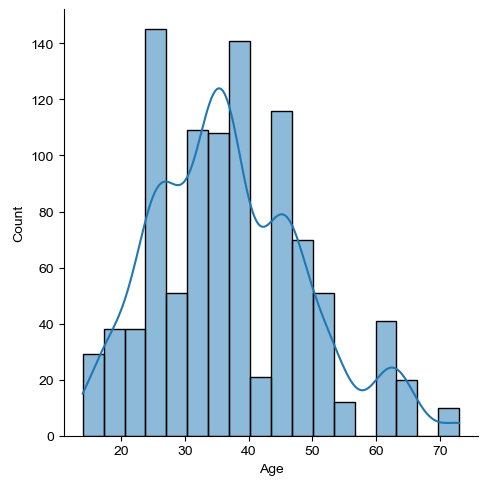

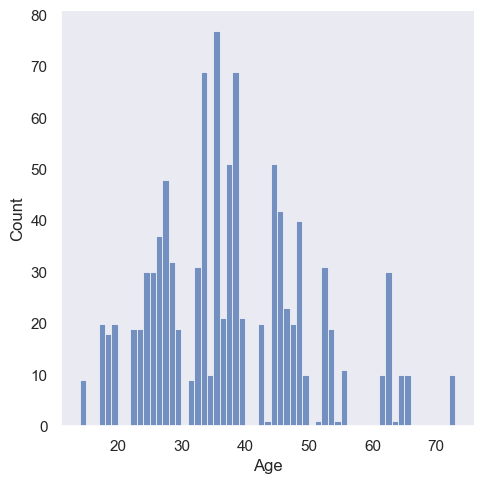

In [71]:
import seaborn as sns
sns.set_theme()
sns.set_style("dark")

sns.displot(dfrelevant, x="Age", binwidth=1)
plt.show()

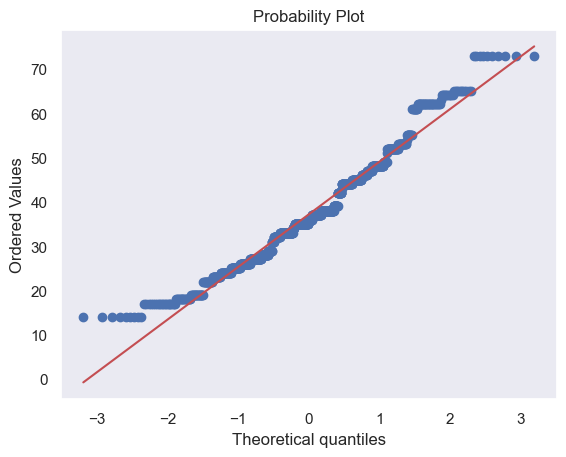

In [72]:
stats.probplot(dfrelevant.Age, dist="norm", plot=plt)
plt.show()

# Skewness & Kurtosis

In [73]:
import scipy

In [74]:
from scipy.stats import skew
from scipy.stats import kurtosis

print("Skewness is", skew(dfrelevant.Age, axis=0, bias=True))
print("Kurtosis is", scipy.stats.kurtosis(dfrelevant.Age, axis=0, fisher=True, bias=True))

Skewness is 0.5502689405577516
Kurtosis is 0.05324893367768002


# Todo
- P-P plots
- box plots?
- z-values
- How to deal with not normal data
